In [59]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [60]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [61]:
requests.__version__

'2.24.0'

In [62]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [63]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform (-180, 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [64]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [65]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-86.05662570955678 -164.81600434149945
-52.1142938048075 -107.71169721362732
-57.36963102157079 167.42476742118777
70.22913562350453 167.7254577806205
11.226645508650876 59.406711308838766
81.40762921518956 114.39779171272016
80.50804709084036 -100.87755506733426
-71.12991637534994 105.74664892833079
-16.629674949050482 -54.6257126983751
51.01186640880127 93.07185751174683
54.83299115541837 93.2043494251036
-52.20695820831574 -53.50622818554922
66.49712594216939 58.510796834687056
84.76491253939147 60.216103074135276
-71.21821858196692 154.72516316127076
25.259958531089993 115.1434560890641
31.347840159072163 77.42282520485185
17.59563561722318 98.49659253152925
71.95778716912875 63.10768644662477
61.66706920967769 121.11054385426257
-86.98693545159618 127.1298082463876
54.60101186724333 -106.80402337211765
-60.993257974910236 -6.843822988159246
46.74129309163331 -33.64678337441802
61.90170955320934 -103.50043227450698
63.762989822541954 -40.223802531613245
31.226606236912488 -94.07943

-36.29255322756117 -10.732629392237385
12.149879051232858 -36.76648119126875
29.03127966376377 -168.88835319047072
-55.91838732746312 -79.37607117790292
83.37593488951347 125.12748944607023
-14.416930048568133 62.544437780004245
81.51236874722667 62.258494912903444
67.74355741725844 -122.77665889632104
14.769348154695848 -82.37759981414221
72.51210648403122 -49.262374844484384
-26.779977919949772 -137.85197378527147
42.84691398587111 -121.90628463716146
-44.39674029112618 -43.10779145593219
7.058568637759677 131.21370773791818
-37.89869009112226 -91.18462653411535
-32.332848142870475 -141.98311452701728
67.72295022468751 70.82051648089265
-7.804896833336187 26.01219369312716
5.501119161804951 -144.19789526640304
-54.33019039710689 -33.83270485647401
62.425607123485605 -41.42928667140856
46.550830683468035 41.89270249991907
28.725249354117054 82.9872361108043
-20.355994408716484 148.28270036676776
42.825217591551706 179.0775109343317
26.99766736776236 -119.08666914486462
30.879621995417

58.154450283535056 118.76127928229369
88.31532360633776 14.307442726334983
-76.96205665985876 -109.93133472855423
13.685021499027059 30.263383817965718
-52.401617023977636 57.42393776976937
-46.25243183610984 40.045660529316706
-41.284053938663675 -25.500674405498785
-68.76372439732486 52.225222412585026
-27.261463148272952 137.20758664387967
-82.4888277317104 72.13711696337927
-37.87004215327686 36.343867277406304
-73.72115169369934 -69.45571155439075
6.586379015922091 -149.44540980011644
0.36950194930952307 14.336756493688256
-63.27572021272046 -87.71322433572811
80.93641056143281 121.92704841995271
45.938990978684615 -83.70612653348411
2.723726993377028 -80.85709606668966
52.245930957410536 -80.00315501757755
-47.262127084647354 -136.26603485566633
-15.7093670572077 101.83222366793808
-36.92933365393762 -124.25433551071492
47.87321183818048 21.393236441713384
45.232772470837574 0.26115054889038447
70.98537649371636 -77.29638856441264
20.986665845377374 27.19373451607757
23.552060810

In [66]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

658

In [67]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [68]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | salalah
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | rondonopolis
Processing Record 10 of Set 1 | khovu-aksy
Processing Record 11 of Set 1 | krasnokamensk
Processing Record 12 of Set 1 | rawson
Processing Record 13 of Set 1 | usinsk
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | ganzhou
Processing Record 16 of Set 1 | narkanda
Processing Record 17 of Set 1 | mae ramat
Processing Record 18 of Set 1 | verkhnevilyuysk
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | shellbrook
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | lagoa
Processing Record 23 of Set 1 | la ronge
Processing Record 24 of Set

Processing Record 37 of Set 4 | pitimbu
Processing Record 38 of Set 4 | tuktoyaktuk
Processing Record 39 of Set 4 | lewistown
Processing Record 40 of Set 4 | parana
Processing Record 41 of Set 4 | sur
Processing Record 42 of Set 4 | gwadar
Processing Record 43 of Set 4 | nacala
Processing Record 44 of Set 4 | katangli
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 4 | champerico
Processing Record 48 of Set 4 | napanee
Processing Record 49 of Set 4 | hasaki
Processing Record 50 of Set 4 | peschanokopskoye
Processing Record 1 of Set 5 | ouesso
Processing Record 2 of Set 5 | jiddah
City not found. Skipping...
Processing Record 3 of Set 5 | bereznehuvate
Processing Record 4 of Set 5 | grand gaube
Processing Record 5 of Set 5 | murgab
Processing Record 6 of Set 5 | baiyin
Processing Record 7 of Set 5 | bontang
Processing Record 8 of Set 5 | ahipara
Processing Record 9 of Set 

Processing Record 23 of Set 8 | valleyview
Processing Record 24 of Set 8 | pervomayskoye
Processing Record 25 of Set 8 | halmaj
Processing Record 26 of Set 8 | mapastepec
Processing Record 27 of Set 8 | tres arroyos
Processing Record 28 of Set 8 | wanganui
Processing Record 29 of Set 8 | norman wells
Processing Record 30 of Set 8 | iralaya
Processing Record 31 of Set 8 | klamath falls
Processing Record 32 of Set 8 | kloulklubed
Processing Record 33 of Set 8 | yar-sale
Processing Record 34 of Set 8 | kamina
Processing Record 35 of Set 8 | novyy yegorlyk
Processing Record 36 of Set 8 | baglung
Processing Record 37 of Set 8 | bowen
Processing Record 38 of Set 8 | nikolskoye
Processing Record 39 of Set 8 | havelock
Processing Record 40 of Set 8 | preobrazheniye
Processing Record 41 of Set 8 | muros
Processing Record 42 of Set 8 | boa viagem
Processing Record 43 of Set 8 | paka
Processing Record 44 of Set 8 | sao miguel do araguaia
Processing Record 45 of Set 8 | roald
Processing Record 46 

Processing Record 10 of Set 12 | te anau
Processing Record 11 of Set 12 | assiniboia
Processing Record 12 of Set 12 | la roda
Processing Record 13 of Set 12 | grand-lahou
Processing Record 14 of Set 12 | sulangan
Processing Record 15 of Set 12 | komsomolskiy
Processing Record 16 of Set 12 | xucheng
Processing Record 17 of Set 12 | bridlington
Processing Record 18 of Set 12 | saint-louis
Processing Record 19 of Set 12 | pacifica
Processing Record 20 of Set 12 | sakaiminato
Processing Record 21 of Set 12 | aras
Processing Record 22 of Set 12 | praya
Processing Record 23 of Set 12 | westpunt
City not found. Skipping...
Processing Record 24 of Set 12 | guerrero negro
Processing Record 25 of Set 12 | acapulco
Processing Record 26 of Set 12 | chara
Processing Record 27 of Set 12 | bara
Processing Record 28 of Set 12 | okandja
City not found. Skipping...
Processing Record 29 of Set 12 | thessalon
Processing Record 30 of Set 12 | esmeraldas
Processing Record 31 of Set 12 | moose factory
Proces

In [69]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,39.47,91,100,8.68,NZ,2022-10-05 21:03:31
1,Castro,-24.7911,-50.0119,68.20,77,100,2.68,BR,2022-10-05 21:03:31
2,Bluff,-46.6000,168.3333,39.79,75,95,21.56,NZ,2022-10-05 21:03:32
3,Bilibino,68.0546,166.4372,21.65,87,100,7.49,RU,2022-10-05 21:03:32
4,Salalah,17.0151,54.0924,78.06,80,100,3.40,OM,2022-10-05 21:03:32
5,Saskylakh,71.9167,114.0833,4.17,99,82,4.65,RU,2022-10-05 21:03:33
6,Yellowknife,62.4560,-114.3525,37.56,64,6,15.01,CA,2022-10-05 21:01:23
7,Albany,42.6001,-73.9662,65.34,80,95,2.51,US,2022-10-05 21:03:33
8,Rondonopolis,-16.4708,-54.6356,82.54,62,94,5.73,BR,2022-10-05 21:03:34
9,Khovu-Aksy,51.1333,93.6000,35.62,53,100,2.42,RU,2022-10-05 21:03:34


In [70]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

df = df.reindex(columns=new_column_order)

df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-10-05 17:36:04,NaN,NaN,NaN,NaN,NaN,NaN
1,Mporokoso,ZM,2022-10-05 17:39:09,NaN,NaN,NaN,NaN,NaN,NaN
2,Atar,MR,2022-10-05 17:36:50,NaN,NaN,NaN,NaN,NaN,NaN
3,Albany,US,2022-10-05 17:35:09,NaN,NaN,NaN,NaN,NaN,NaN
4,Haines Junction,CA,2022-10-05 17:39:12,NaN,NaN,NaN,NaN,NaN,NaN
5,Punta Arenas,CL,2022-10-05 17:38:55,NaN,NaN,NaN,NaN,NaN,NaN
6,Yellowknife,CA,2022-10-05 17:35:17,NaN,NaN,NaN,NaN,NaN,NaN
7,Fortuna,US,2022-10-05 17:39:13,NaN,NaN,NaN,NaN,NaN,NaN
8,Birjand,IR,2022-10-05 17:39:13,NaN,NaN,NaN,NaN,NaN,NaN
9,Namibe,AO,2022-10-05 17:39:14,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [73]:
len(city_data_df)

599

In [74]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

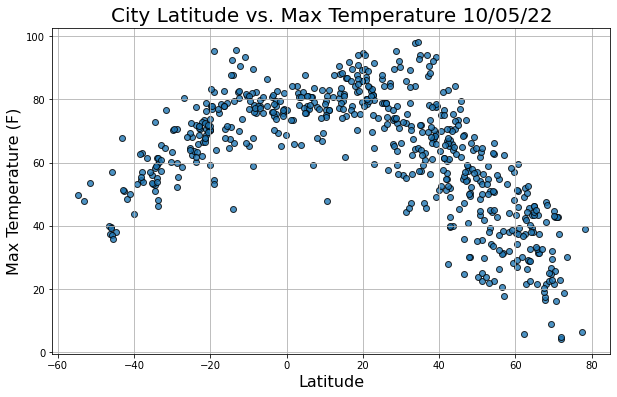

In [75]:
# Build the scatter plot for latitude vs. max temperature.
plt.figure(figsize = (10, 6))
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"), fontsize = 20)
plt.ylabel("Max Temperature (F)", fontsize = 16)
plt.xlabel("Latitude", fontsize = 16)
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

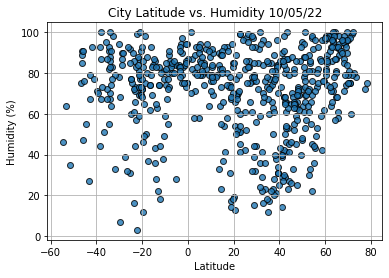

In [76]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

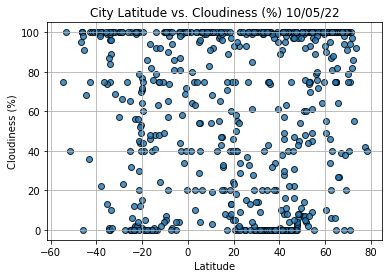

In [77]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

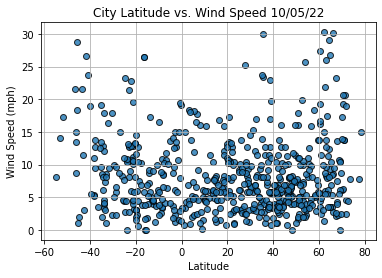

In [78]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [120]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [121]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

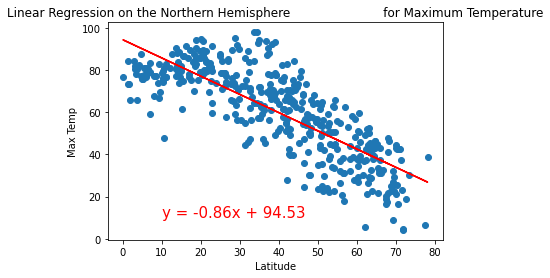

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,10))

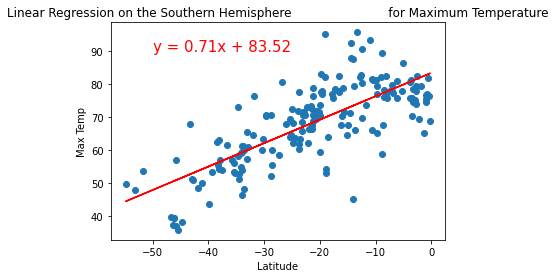

In [122]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

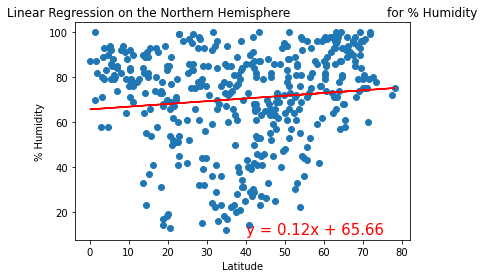

In [123]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

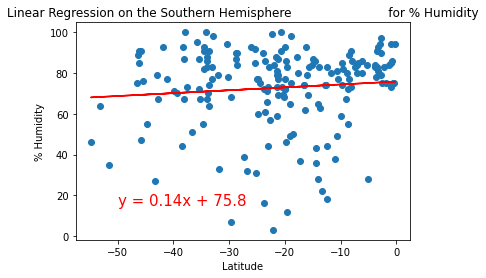

In [124]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

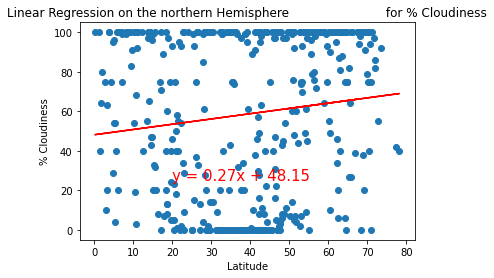

In [125]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,25))

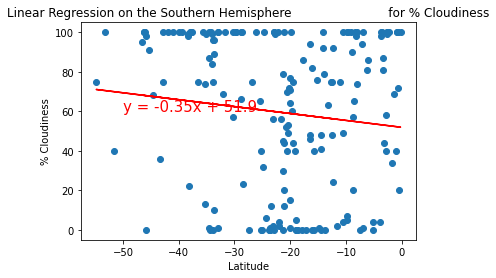

In [126]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

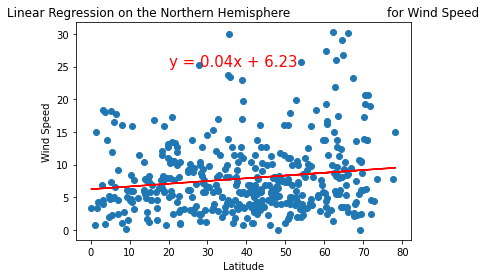

In [135]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,25))

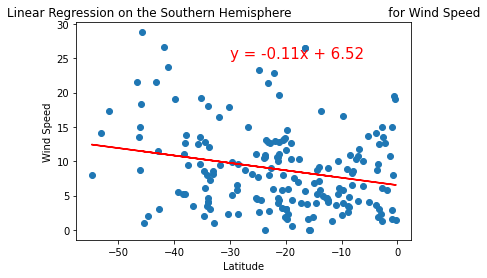

In [139]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,25))